Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


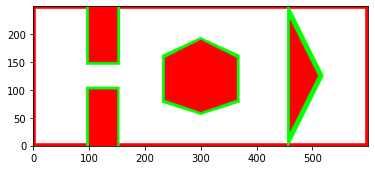

In [20]:
import matplotlib.pyplot as plt 
import numpy as np 
import math
import cv2 

# https://stackoverflow.com/questions/69671976/python-function-to-find-a-point-of-an-equilateral-triangle
def find_equal_triangle_coordinate(pt1, pt2):
                    
    pt3_x = (pt1[0]+pt2[0]+np.sqrt(3)*(pt1[1]-pt2[1]))/2 
    pt3_y = (pt1[1]+pt2[1]+np.sqrt(3)*(pt1[0]-pt2[0]))/2  
    unknown_pt = np.array([pt3_x, pt3_y])
    
    return unknown_pt

# Resource https://www.geeksforgeeks.org/program-find-line-passing-2-points/
def compute_line_abc(pt_a, pt_b):

    a_val = pt_b[1] - pt_a[1]
    b_val = pt_a[0] - pt_b[0]
    c_val = (a_val*(pt_a[0])) + (b_val*(pt_a[1]))

    return a_val, b_val, c_val

def create_map_grid():
    
    # Define map grid side
    map_height = 250
    map_width = 600
    map_grid = np.ones((map_height,map_width,3))
    
    # Define obstacle and wall color
    obstacle_color = (255,0,0) #RED
    # Define obstacle clearance color
    clearance_color = (0,255,0) #GREEN
    
    # Clearance mm_to_pixels_factor mm_to_pixels_factor 
    
    
    
    
    triangle_factor = 1000
    c = 5 #5 pixels
    
    # Set wall color 
    #cv2.rectangle(map_grid, (1,250), (600,1), obstacle_color, 5)
    for y in range(map_height):
        for x in range(map_width):
            
            # Plot walls
            # map_height = 250
            # map_width = 600
            if (x >= 0 and x < map_width and y >= 0 and y<5) or (x >= 0 and x < map_width and y >= 245  and y<map_height):
                map_grid[y,x] = obstacle_color
                
            if (x >= 0 and x < 5 and y >= 0 and y<map_height) or (x >= 595 and x < map_width and y >= 0 and y<map_height):
                map_grid[y,x] = obstacle_color

            #print(map_grid[0,559]) #IndexError: index 250 is out of bounds for axis 0 with size 250
                

            # Display rectangles 
            # Plot lower rectange obstacle space
            if x >= 100-c and x < 150+c and y >= 0-c and y <= 100+c:
                map_grid[y,x] = clearance_color
            # Plot lower rectange clearance
            if x >= 100 and x <= 150 and y >= 0 and y <= 100:
                map_grid[y,x] = obstacle_color

            # Plot upper rectange clearance
            if x >= 100-c and x <= 150+c and y >= 150-c and y <= 250+c:
                map_grid[y,x] = clearance_color
            # Plot upper rectange obstacle space
            if x >= 100 and x <= 150 and y >= 150 and y <= 250:
                map_grid[y,x] = obstacle_color
                
            #############################################################
            # Display hexagon
            
            hexagon_x_center = 300 #100+50+150
            hexagon_y_center = 125
            hex_edge_length = 75

            # Resource: quora.com/How-do-you-find-the-distance-between-the-edges-and-the-center-of-a-regular-hexagon-if-you-know-the-length-of-its-sides
            hex_dist_center_to_edge = hex_edge_length * math.sqrt(3)/2

            # Hexagon Vertex 1 - Top
            v1_x = int(100 + 50 + 150)
            v1_y = int(125 + hex_dist_center_to_edge)

            vertex1 = [hexagon_x_center, hexagon_y_center]
            vertex2 = [v1_x,v1_y]
            result = find_equal_triangle_coordinate(vertex1, vertex2)

            # Hexagon Center Coordinate
            map_grid = cv2.circle(map_grid, (hexagon_x_center,hexagon_y_center), radius=5, color=(255,0,0), thickness=-1)

            # Hexagon Vertex 2
            v2_x = 100 + 50 + 150 + hex_dist_center_to_edge
            v2_y = int(result[1])

            # Hexagon Vertex 6
            v6_x = v1_x - hex_dist_center_to_edge
            v6_y = int(result[1])

            # Hexagon Vertex 3
            v3_x = int(v2_x)
            v3_y = int(result[1]) - hex_edge_length

            # Hexagon Vertex 4
            v4_x = int(v1_x)
            v4_y = int(125 - hex_dist_center_to_edge) 

            # Hexagon Vertex 5
            v5_x = int(v6_x)
            v5_y = int(result[1])-hex_edge_length
            
            pt1 = [v1_x,v1_y+c]
            pt2 = [v2_x+c,v2_y+c]
            pt3 = [v3_x+c,v3_y-c]
            pt4 = [v4_x,v4_y-c]
            pt5 = [v5_x-c,v5_y-c]
            pt6 = [v6_x-c,v6_y+c]
            
            l1a, l1b, l1c = compute_line_abc(pt1, pt2)
            l2a, l2b, l2c = compute_line_abc(pt2, pt3)
            l3a, l3b, l3c = compute_line_abc(pt3, pt4)
            l4a, l4b, l4c = compute_line_abc(pt4, pt5)
            l5a, l5b, l5c = compute_line_abc(pt5, pt6)
            l6a, l6b, l6c = compute_line_abc(pt6, pt1)
            
            if ( ((l1b*y)+(l1a*x)-l1c) >= 0  and ((l2b*y)+(l2a*x)-l2c) >= 0) and ((l3b*y)+(l3a*x)-l3c) >= 0 and ((l4b*y)+(l4a*x)-l4c) >= 0 and ((l5b*y)+(l5a*x)-l5c) >= 0 and ((l6b*y)+(l6a*x)-l6c) >= 0:
                map_grid[y,x] = clearance_color
        
            pt1 = [v1_x,v1_y]
            pt2 = [v2_x,v2_y]
            pt3 = [v3_x,v3_y]
            pt4 = [v4_x,v4_y]
            pt5 = [v5_x,v5_y]
            pt6 = [v6_x,v6_y]
            
            l1a, l1b, l1c = compute_line_abc(pt1, pt2)
            l2a, l2b, l2c = compute_line_abc(pt2, pt3)
            l3a, l3b, l3c = compute_line_abc(pt3, pt4)
            l4a, l4b, l4c = compute_line_abc(pt4, pt5)
            l5a, l5b, l5c = compute_line_abc(pt5, pt6)
            l6a, l6b, l6c = compute_line_abc(pt6, pt1)
            
            if ( ((l1b*y)+(l1a*x)-l1c) >= 0  and ((l2b*y)+(l2a*x)-l2c) >= 0) and ((l3b*y)+(l3a*x)-l3c) >= 0 and ((l4b*y)+(l4a*x)-l4c) >= 0 and ((l5b*y)+(l5a*x)-l5c) >= 0 and ((l6b*y)+(l6a*x)-l6c) >= 0:
                map_grid[y,x] = obstacle_color
                
            #############################################################
            # Display triangle 
            
            tri_low_pt = [460,25]
            tri_up_pt = [460,225]
            tri_right_pt = [510,125]
            
            t1a, t1b, t1c = compute_line_abc(tri_low_pt, tri_up_pt)
            t2a, t2b, t2c = compute_line_abc(tri_low_pt, tri_right_pt)
            t3a, t3b, t3c = compute_line_abc(tri_up_pt, tri_right_pt)
            
            if ( ((t1b*y)+(t1a*x)-(t1c-triangle_factor)) >= 0  and ((t2b*y)+(t2a*x)-(t2c+triangle_factor)) <= 0 and ((t3b*y)+(t3a*x)-(t3c-triangle_factor)) >= 0):
                map_grid[y,x] = clearance_color
            
            tri_low_pt = [460,25]
            tri_up_pt = [460,225]
            tri_right_pt = [510,125]
            
            t1a, t1b, t1c = compute_line_abc(tri_low_pt, tri_up_pt)
            t2a, t2b, t2c = compute_line_abc(tri_low_pt, tri_right_pt)
            t3a, t3b, t3c = compute_line_abc(tri_up_pt, tri_right_pt)
            
            if ( ((t1b*y)+(t1a*x)-t1c) >= 0  and ((t2b*y)+(t2a*x)-t2c) <= 0 and ((t3b*y)+(t3a*x)-t3c) >= 0):
                map_grid[y,x] = obstacle_color
                

                
    plt.figure()
    plt.imshow(map_grid, origin="lower")
    
     

create_map_grid()

